# Iris flower dataset
In the whole exercise, we will work with the famous Iris flower dataset, which was collected in 1936 by Ronald Fisher, a statistician and biologist. Use the `datasets` module from scikit-learn to load the iris dataset.

In [2]:
from sklearn.datasets import load_iris

flowers = load_iris()

 a) Check keys on the loaded data and check what the different values for each key are.

In [4]:
flowers.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [9]:
print(flowers["DESCR"])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [25]:
flowers["data"].shape, flowers["target"].shape

((150, 4), (150,))

In [16]:
flowers.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [11]:
import pandas as pd

pd.DataFrame(flowers["data"]).head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [12]:
flowers["feature_names"]

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

b) Now insert the data into a DataFrame.

In [13]:
df = pd.DataFrame(flowers["data"], columns=flowers["feature_names"])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [15]:
df["class"] = flowers.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


c) Do some EDA to get an understanding of the dataset.

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   class              150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [19]:
df.describe().T.drop("count", axis="columns")

,mean,std,min,25%,50%,75%,max
sepal length (cm),5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width (cm),3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal length (cm),3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal width (cm),1.199333,0.762238,0.1,0.3,1.30,1.8,2.5
class,1.000000,0.819232,0.0,0.0,1.00,2.0,2.0


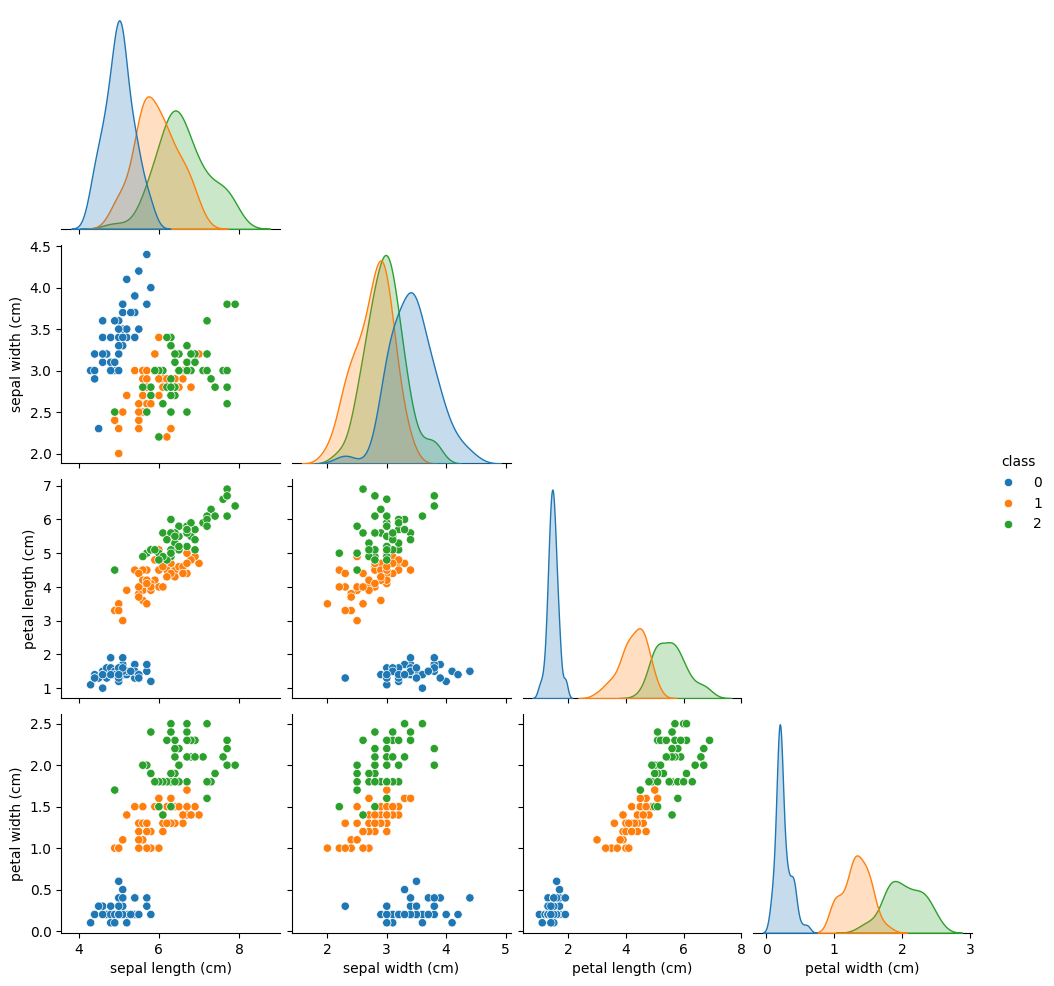

In [23]:
import seaborn as sns

sns.pairplot(df, corner=True, hue="class", palette="tab10")

d) Make a correlation heatmap to see how each feature is correlated to each other. What do the numbers mean?

In [26]:
df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
class,0.782561,-0.426658,0.949035,0.956547,1.000000


<Axes: >

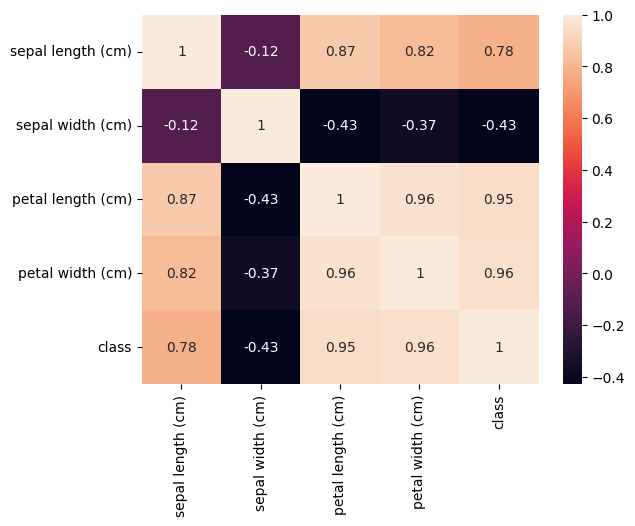

In [30]:
sns.heatmap(df.corr(), annot=True)

  e) Make a boxplot. The points outside of the boxplot are statistically calculated outliers using Tukey's rule for boxplot.

<Axes: >

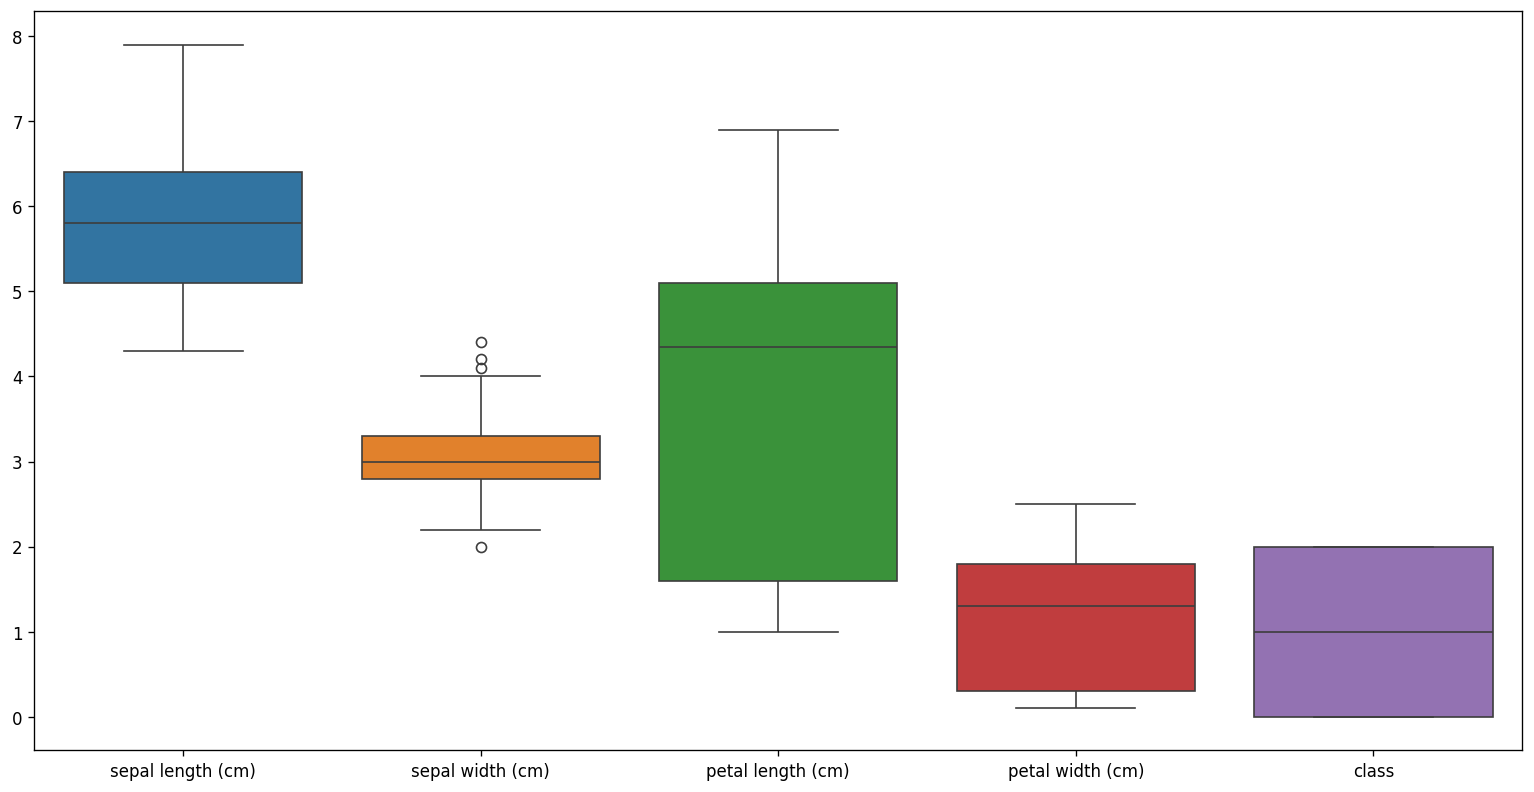

In [39]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, figsize=(16,8), dpi=120)
sns.boxplot(df)

f) Now remove the outliers in data. (\*\*)

- Lower bound outlier: $Q_1 - 1.5\cdot IQR$
- Upper bound outlier: $Q_3 + 1.5\cdot IQR$

where $Q_1$ is the 1st quartile or 25 percentile, $Q_3$ is the 3rd quartile or 75 percentile and $IQR = Q_3-Q_1$ is the interquartile range.

In [ ]:
q1 = df["sepal width (cm)"].quantile(0.25)
q3 = df["sepal width (cm)"].quantile(0.75)
iqr = q3 - q1

print(f"{q1 = }, {q3 = }, {iqr = }")


q1 = np.float64(2.8), q3 = np.float64(3.3), iqr = np.float64(0.5)


In [43]:
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

print(f"{lower_bound = }, {upper_bound = }")

lower_bound = np.float64(2.05), upper_bound = np.float64(4.05)


In [45]:
df_no_outliers = df[(df["sepal width (cm)"] >= lower_bound) & (df["sepal width (cm)"] <= upper_bound)]
df_no_outliers.shape

(146, 5)

g) Do train|test split on the dataset and then scale it with feature standardization.

In [51]:
X, y = df_no_outliers.drop("class", axis="columns"), df_no_outliers["class"]

X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [52]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: class, dtype: int64

In [53]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)
X_train.shape, X_test.shape

((97, 4), (49, 4))

In [54]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

scaled_X_train.mean(), scaled_X_train.std(), scaled_X_test.mean(), scaled_X_test.std()

(np.float64(4.944498418949151e-16),
 np.float64(0.9999999999999997),
 np.float64(-0.026200181679167572),
 np.float64(0.9999349444958893))

h) Classify using logistic regression

In [57]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(scaled_X_train, y_train)

y_pred = model.predict(scaled_X_test)
y_pred

array([0, 2, 0, 0, 0, 2, 0, 1, 2, 0, 0, 2, 2, 1, 2, 0, 1, 2, 0, 1, 2, 2,
       0, 1, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 0, 0, 2, 1, 1, 1, 2, 2, 2, 0,
       2, 2, 0, 0, 2])

i) Classify the first 10 values of your $X_{test}$ and compare it manually with your labels.

In [56]:
y_test.values

array([0, 2, 0, 0, 0, 2, 0, 1, 1, 0, 0, 2, 2, 1, 2, 0, 1, 2, 0, 1, 2, 2,
       0, 1, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 0, 0, 2, 1, 1, 1, 2, 2, 2, 0,
       2, 2, 0, 0, 2])

j) Evaluate your model using classification report and confusion matrix.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.91      0.95        11
           2       0.95      1.00      0.97        19

    accuracy                           0.98        49
   macro avg       0.98      0.97      0.98        49
weighted avg       0.98      0.98      0.98        49



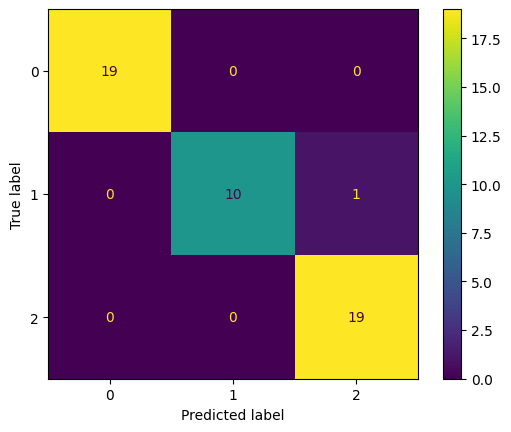

In [58]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()